In [1]:
import numpy as np
import scipy.io
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
def loss_hesapla(thetas,X,Y):
    return np.sum(((X.dot(thetas.T)-Y)**2)/(2*X.shape[0]))

In [3]:
def loss_hesapla_reg(thetas,X,Y,reg_katsayi=0.1):
    return (np.sum(((X.dot(thetas.T)-Y)**2))+reg_katsayi*np.sum(thetas[:,1:]**2))/(2*X.shape[0])

In [4]:
def gradient_descent_reg(thetas,X,Y,reg_katsayi=0.01,lr=0.1):
    thetas -= (lr*((X.dot(thetas.T)-Y).T.dot(X)))/X.shape[0]
    thetas[:,1:] -= (reg_katsayi/X.shape[0])*(thetas[:,1:])
    return thetas

In [5]:
def polinom_feature(X,derece):
    temp = np.empty((X.shape[0],derece-1))
    for i in range(2,derece+1):
        temp[:,i-2:i-1] = X**i
    return np.concatenate([X,temp],axis=1)

In [6]:
data = scipy.io.loadmat('ex5data1.mat')
x_train = data['X']
y_train = data['y']
x_val = data['Xval']
y_val = data['yval']
x_test = data['Xtest']
y_test = data['ytest']

In [7]:
rang = x_train.max() - x_train.min()
x_train = (x_train-x_train.mean())/rang

rang = x_val.max() - x_val.min()
x_val = (x_val-x_val.mean())/rang

rang = x_test.max() - x_test.min()
x_test = (x_test-x_test.mean())/rang

In [8]:
derece = 10
x_train = polinom_feature(x_train,derece)
x_val = polinom_feature(x_val,derece)
x_test = polinom_feature(x_test,derece)

In [9]:
x_train = np.concatenate([np.ones((x_train.shape[0],1)),x_train],axis=1)
x_val = np.concatenate([np.ones((x_val.shape[0],1)),x_val],axis=1)
x_test = np.concatenate([np.ones((x_test.shape[0],1)),x_test],axis=1)

### Regüralizasyon ile Lineer Regresyon için ideal reg_degerinin bulunması

In [10]:
iterasyon = 10000
loss_list = list()

In [11]:
#reg_values = [0,0.001,0.01,0.1,1,10,100,1000]
reg_values = list(np.arange(0,0.1,0.01))

In [12]:
son_losslar_train = list()
son_losslar_val = list()
for reg_value in reg_values:
    #np.random.seed(1234)
    #thetas = np.random.randn(1,x_train.shape[1])
    thetas = np.ones((1,x_train.shape[1]))
    for i in range(iterasyon):
        for j in range(x_train.shape[0]):
            thetas = gradient_descent_reg(thetas,x_train[j:j+1],y_train[j:j+1],lr=0.3,reg_katsayi=reg_value)
    son_losslar_train.append(loss_hesapla(thetas,x_train,y_train))
    son_losslar_val.append(loss_hesapla(thetas,x_val,y_val))

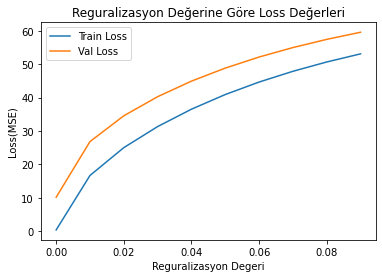

In [13]:
plt.plot(reg_values,son_losslar_train)
plt.plot(reg_values,son_losslar_val)
plt.xlabel("Reguralizasyon Degeri")
plt.ylabel("Loss(MSE)")
plt.legend(["Train Loss","Val Loss"])
plt.title("Reguralizasyon Değerine Göre Loss Değerleri")
plt.show()

In [14]:
iterasyon = 300000
train_losses = list()
val_losses = list()
thetas = np.ones((1,x_train.shape[1]))

In [15]:
for i in range(iterasyon):
    for j in range(x_train.shape[0]):
        thetas = gradient_descent_reg(thetas,x_train[j:j+1],y_train[j:j+1],lr=0.3,
                                      reg_katsayi=reg_values[son_losslar_train.index(min(son_losslar_train))])
    train_losses.append(loss_hesapla_reg(thetas,x_train,y_train,
                                      reg_katsayi=reg_values[son_losslar_train.index(min(son_losslar_train))]))
    val_losses.append(loss_hesapla(thetas,x_val,y_val))
    if(i%100 == 0):
        train_loss = loss_hesapla_reg(thetas,x_train,y_train,
                                      reg_katsayi=reg_values[son_losslar_train.index(min(son_losslar_train))])
        val_loss = loss_hesapla(thetas,x_val,y_val)
        print("{0}.iterasyon, Train Loss = {1}, Val Loss = {2}".format(i,train_loss,val_loss))

0.iterasyon, Train Loss = 38.914506131899394, Val Loss = 47.21958182720523
100.iterasyon, Train Loss = 0.9651791251408737, Val Loss = 9.561566576701356
200.iterasyon, Train Loss = 0.9202193887327333, Val Loss = 9.272552318648732
300.iterasyon, Train Loss = 0.8966956883724316, Val Loss = 9.155318030634145
400.iterasyon, Train Loss = 0.877079673695457, Val Loss = 9.071837249335882
500.iterasyon, Train Loss = 0.8598468656708512, Val Loss = 9.01196808753167
600.iterasyon, Train Loss = 0.84413377197007, Val Loss = 8.970124094079313
700.iterasyon, Train Loss = 0.829431450337751, Val Loss = 8.94213016072681
800.iterasyon, Train Loss = 0.8154415936985161, Val Loss = 8.92481078445422
900.iterasyon, Train Loss = 0.8019904514758772, Val Loss = 8.915736447808142
1000.iterasyon, Train Loss = 0.7889773376043022, Val Loss = 8.913039850471346
1100.iterasyon, Train Loss = 0.7763439739272383, Val Loss = 8.915280452835539
1200.iterasyon, Train Loss = 0.7640563499769408, Val Loss = 8.921343565913489
1300.

11000.iterasyon, Train Loss = 0.34615702199190257, Val Loss = 10.23179835455204
11100.iterasyon, Train Loss = 0.34524446307704343, Val Loss = 10.239697492147299
11200.iterasyon, Train Loss = 0.344353337934516, Val Loss = 10.247501837529445
11300.iterasyon, Train Loss = 0.34348306900132713, Val Loss = 10.25521237170615
11400.iterasyon, Train Loss = 0.34263309467801384, Val Loss = 10.262830071934712
11500.iterasyon, Train Loss = 0.34180286888281924, Val Loss = 10.270355911489728
11600.iterasyon, Train Loss = 0.34099186061839926, Val Loss = 10.277790859441827
11700.iterasyon, Train Loss = 0.34019955355066833, Val Loss = 10.285135880447566
11800.iterasyon, Train Loss = 0.339425445599479, Val Loss = 10.2923919345498
11900.iterasyon, Train Loss = 0.33866904854077334, Val Loss = 10.299559976988295
12000.iterasyon, Train Loss = 0.33792988761989234, Val Loss = 10.306640958020168
12100.iterasyon, Train Loss = 0.3372075011757503, Val Loss = 10.313635822749857
12200.iterasyon, Train Loss = 0.33650

22000.iterasyon, Train Loss = 0.30587181696623195, Val Loss = 10.709618514608593
22100.iterasyon, Train Loss = 0.30573268304581547, Val Loss = 10.711649281856388
22200.iterasyon, Train Loss = 0.30559486000522146, Val Loss = 10.713655992628668
22300.iterasyon, Train Loss = 0.30545831892184616, Val Loss = 10.71563897088275
22400.iterasyon, Train Loss = 0.3053230316125863, Val Loss = 10.717598536426824
22500.iterasyon, Train Loss = 0.30518897061395184, Val Loss = 10.719535004966158
22600.iterasyon, Train Loss = 0.305056109162731, Val Loss = 10.72144868814941
22700.iterasyon, Train Loss = 0.30492442117719243, Val Loss = 10.723339893614252
22800.iterasyon, Train Loss = 0.30479388123879675, Val Loss = 10.725208925032934
22900.iterasyon, Train Loss = 0.3046644645744138, Val Loss = 10.727056082157437
23000.iterasyon, Train Loss = 0.3045361470390372, Val Loss = 10.728881660864173
23100.iterasyon, Train Loss = 0.3044089050989621, Val Loss = 10.730685953198583
23200.iterasyon, Train Loss = 0.3042

32300.iterasyon, Train Loss = 0.29539977539484724, Val Loss = 10.834938512925628
32400.iterasyon, Train Loss = 0.29531901625254814, Val Loss = 10.835634504926615
32500.iterasyon, Train Loss = 0.29523847778614104, Val Loss = 10.836324700593652
32600.iterasyon, Train Loss = 0.2951581574023065, Val Loss = 10.837009180029991
32700.iterasyon, Train Loss = 0.29507805255969627, Val Loss = 10.837688022227347
32800.iterasyon, Train Loss = 0.2949981607677171, Val Loss = 10.83836130508097
32900.iterasyon, Train Loss = 0.2949184795853457, Val Loss = 10.83902910540454
33000.iterasyon, Train Loss = 0.2948390066199784, Val Loss = 10.839691498944807
33100.iterasyon, Train Loss = 0.29475973952629414, Val Loss = 10.84034856039622
33200.iterasyon, Train Loss = 0.2946806760051713, Val Loss = 10.841000363415139
33300.iterasyon, Train Loss = 0.2946018138026027, Val Loss = 10.841646980634055
33400.iterasyon, Train Loss = 0.2945231507086686, Val Loss = 10.842288483675471
33500.iterasyon, Train Loss = 0.294444

42600.iterasyon, Train Loss = 0.2879375365248005, Val Loss = 10.886511242682419
42700.iterasyon, Train Loss = 0.28787156224728744, Val Loss = 10.886886885193615
42800.iterasyon, Train Loss = 0.2878056871628593, Val Loss = 10.88726111903935
42900.iterasyon, Train Loss = 0.28773991080654787, Val Loss = 10.887633962927875
43000.iterasyon, Train Loss = 0.28767423271950715, Val Loss = 10.88800543530335
43100.iterasyon, Train Loss = 0.28760865244891487, Val Loss = 10.88837555434953
43200.iterasyon, Train Loss = 0.2875431695478623, Val Loss = 10.888744337993497
43300.iterasyon, Train Loss = 0.28747778357524584, Val Loss = 10.889111803909154
43400.iterasyon, Train Loss = 0.28741249409567554, Val Loss = 10.889477969520868
43500.iterasyon, Train Loss = 0.2873473006793702, Val Loss = 10.889842852006973
43600.iterasyon, Train Loss = 0.2872822029020587, Val Loss = 10.890206468303129
43700.iterasyon, Train Loss = 0.28721720034488807, Val Loss = 10.890568835105846
43800.iterasyon, Train Loss = 0.2871

53500.iterasyon, Train Loss = 0.28125738854785365, Val Loss = 10.921969726445576
53600.iterasyon, Train Loss = 0.2812003587630235, Val Loss = 10.922262286737052
53700.iterasyon, Train Loss = 0.2811433990839248, Val Loss = 10.922554480966838
53800.iterasyon, Train Loss = 0.28108650935948765, Val Loss = 10.922846313084776
53900.iterasyon, Train Loss = 0.28102968943977413, Val Loss = 10.923137786984586
54000.iterasyon, Train Loss = 0.28097293917596877, Val Loss = 10.923428906504652
54100.iterasyon, Train Loss = 0.2809162584203651, Val Loss = 10.923719675428774
54200.iterasyon, Train Loss = 0.2808596470263507, Val Loss = 10.924010097486939
54300.iterasyon, Train Loss = 0.28080310484838894, Val Loss = 10.924300176356143
54400.iterasyon, Train Loss = 0.28074663174200554, Val Loss = 10.924589915661082
54500.iterasyon, Train Loss = 0.2806902275637777, Val Loss = 10.924879318974899
54600.iterasyon, Train Loss = 0.28063389217131707, Val Loss = 10.925168389819948
54700.iterasyon, Train Loss = 0.2

64500.iterasyon, Train Loss = 0.275376886305756, Val Loss = 10.95256263999339
64600.iterasyon, Train Loss = 0.27532684169637217, Val Loss = 10.952829990097822
64700.iterasyon, Train Loss = 0.27527685508181876, Val Loss = 10.953097194227245
64800.iterasyon, Train Loss = 0.2752269263788008, Val Loss = 10.95336425319472
64900.iterasyon, Train Loss = 0.27517705550431987, Val Loss = 10.953631167801644
65000.iterasyon, Train Loss = 0.2751272423756834, Val Loss = 10.953897938837887
65100.iterasyon, Train Loss = 0.2750774869104862, Val Loss = 10.95416456708205
65200.iterasyon, Train Loss = 0.2750277890266145, Val Loss = 10.954431053301555
65300.iterasyon, Train Loss = 0.2749781486422525, Val Loss = 10.954697398252803
65400.iterasyon, Train Loss = 0.2749285656758566, Val Loss = 10.954963602681415
65500.iterasyon, Train Loss = 0.27487904004617586, Val Loss = 10.955229667322266
65600.iterasyon, Train Loss = 0.2748295716722352, Val Loss = 10.955495592899727
65700.iterasyon, Train Loss = 0.27478016

75600.iterasyon, Train Loss = 0.2701589948399926, Val Loss = 10.981474803886394
75700.iterasyon, Train Loss = 0.2701149313797197, Val Loss = 10.981729085080035
75800.iterasyon, Train Loss = 0.2700709180017085, Val Loss = 10.98198326555536
75900.iterasyon, Train Loss = 0.27002695464357535, Val Loss = 10.982237345475582
76000.iterasyon, Train Loss = 0.26998304124306854, Val Loss = 10.98249132500149
76100.iterasyon, Train Loss = 0.2699391777380458, Val Loss = 10.982745204291634
76200.iterasyon, Train Loss = 0.2698953640664805, Val Loss = 10.982998983502249
76300.iterasyon, Train Loss = 0.2698516001664621, Val Loss = 10.983252662787352
76400.iterasyon, Train Loss = 0.2698078859761987, Val Loss = 10.98350624229874
76500.iterasyon, Train Loss = 0.26976422143400697, Val Loss = 10.983759722186036
76600.iterasyon, Train Loss = 0.2697206064783188, Val Loss = 10.984013102596759
76700.iterasyon, Train Loss = 0.2696770410476796, Val Loss = 10.984266383676264
76800.iterasyon, Train Loss = 0.26963352

85900.iterasyon, Train Loss = 0.2658729749687, Val Loss = 11.007157611932456
86000.iterasyon, Train Loss = 0.26583376047803314, Val Loss = 11.007402078886164
86100.iterasyon, Train Loss = 0.26579459016269696, Val Loss = 11.007646454005377
86200.iterasyon, Train Loss = 0.26575546396971056, Val Loss = 11.007890737329015
86300.iterasyon, Train Loss = 0.2657163818461739, Val Loss = 11.008134928895467
86400.iterasyon, Train Loss = 0.2656773437392503, Val Loss = 11.008379028742679
86500.iterasyon, Train Loss = 0.2656383495961836, Val Loss = 11.0086230369081
86600.iterasyon, Train Loss = 0.2655993993642833, Val Loss = 11.008866953428736
86700.iterasyon, Train Loss = 0.26556049299093676, Val Loss = 11.009110778341077
86800.iterasyon, Train Loss = 0.2655216304235981, Val Loss = 11.009354511681186
86900.iterasyon, Train Loss = 0.2654828116097973, Val Loss = 11.009598153484696
87000.iterasyon, Train Loss = 0.26544403649713555, Val Loss = 11.009841703786732
87100.iterasyon, Train Loss = 0.26540530

96600.iterasyon, Train Loss = 0.2619173830737977, Val Loss = 11.032800611811965
96700.iterasyon, Train Loss = 0.26188260839936733, Val Loss = 11.033035405523657
96800.iterasyon, Train Loss = 0.2618478726088597, Val Loss = 11.033270109858906
96900.iterasyon, Train Loss = 0.26181317565612594, Val Loss = 11.033504724831829
97000.iterasyon, Train Loss = 0.26177851749507164, Val Loss = 11.033739250456513
97100.iterasyon, Train Loss = 0.26174389807966536, Val Loss = 11.033973686746867
97200.iterasyon, Train Loss = 0.2617093173639239, Val Loss = 11.034208033716878
97300.iterasyon, Train Loss = 0.26167477530192684, Val Loss = 11.034442291380342
97400.iterasyon, Train Loss = 0.2616402718478086, Val Loss = 11.034676459751063
97500.iterasyon, Train Loss = 0.26160580695575714, Val Loss = 11.03491053884278
97600.iterasyon, Train Loss = 0.2615713805800209, Val Loss = 11.035144528669148
97700.iterasyon, Train Loss = 0.26153699267490244, Val Loss = 11.035378429243744
97800.iterasyon, Train Loss = 0.26

107200.iterasyon, Train Loss = 0.2584390261565319, Val Loss = 11.057193867602
107300.iterasyon, Train Loss = 0.25840812685785536, Val Loss = 11.057419258403419
107400.iterasyon, Train Loss = 0.2583772618500876, Val Loss = 11.057644561151038
107500.iterasyon, Train Loss = 0.2583464310926173, Val Loss = 11.057869775857188
107600.iterasyon, Train Loss = 0.2583156345448909, Val Loss = 11.058094902534089
107700.iterasyon, Train Loss = 0.2582848721663964, Val Loss = 11.058319941194094
107800.iterasyon, Train Loss = 0.2582541439166717, Val Loss = 11.058544891849484
107900.iterasyon, Train Loss = 0.2582234497553038, Val Loss = 11.058769754512612
108000.iterasyon, Train Loss = 0.25819278964192494, Val Loss = 11.058994529195832
108100.iterasyon, Train Loss = 0.2581621635362186, Val Loss = 11.059219215911487
108200.iterasyon, Train Loss = 0.258131571397919, Val Loss = 11.05944381467192
108300.iterasyon, Train Loss = 0.25810101318679896, Val Loss = 11.05966832548955
108400.iterasyon, Train Loss = 

117600.iterasyon, Train Loss = 0.25540198322249125, Val Loss = 11.080165215092507
117700.iterasyon, Train Loss = 0.25537444121300956, Val Loss = 11.080381517575447
117800.iterasyon, Train Loss = 0.2553469295193161, Val Loss = 11.08059773339219
117900.iterasyon, Train Loss = 0.25531944810551216, Val Loss = 11.080813862557386
118000.iterasyon, Train Loss = 0.25529199693574717, Val Loss = 11.081029905085698
118100.iterasyon, Train Loss = 0.2552645759742077, Val Loss = 11.081245860991867
118200.iterasyon, Train Loss = 0.25523718518512734, Val Loss = 11.08146173029059
118300.iterasyon, Train Loss = 0.2552098245327784, Val Loss = 11.081677512996611
118400.iterasyon, Train Loss = 0.25518249398147613, Val Loss = 11.081893209124763
118500.iterasyon, Train Loss = 0.25515519349558036, Val Loss = 11.082108818689838
118600.iterasyon, Train Loss = 0.25512792303948967, Val Loss = 11.082324341706725
118700.iterasyon, Train Loss = 0.25510068257764734, Val Loss = 11.082539778190208
118800.iterasyon, Tra

127900.iterasyon, Train Loss = 0.25271823995711856, Val Loss = 11.101991824677238
128000.iterasyon, Train Loss = 0.2526936391914236, Val Loss = 11.102199282306586
128100.iterasyon, Train Loss = 0.2526690652582226, Val Loss = 11.102406654920799
128200.iterasyon, Train Loss = 0.2526445181257338, Val Loss = 11.102613942537229
128300.iterasyon, Train Loss = 0.25261999776220256, Val Loss = 11.102821145173358
128400.iterasyon, Train Loss = 0.2525955041359242, Val Loss = 11.10302826284661
128500.iterasyon, Train Loss = 0.2525710372152211, Val Loss = 11.103235295574468
128600.iterasyon, Train Loss = 0.2525465969684609, Val Loss = 11.103442243374424
128700.iterasyon, Train Loss = 0.25252218336404236, Val Loss = 11.103649106263996
128800.iterasyon, Train Loss = 0.2524977963704062, Val Loss = 11.103855884260746
128900.iterasyon, Train Loss = 0.2524734359560238, Val Loss = 11.104062577382262
129000.iterasyon, Train Loss = 0.25244910208941407, Val Loss = 11.10426918564611
129100.iterasyon, Train Lo

138000.iterasyon, Train Loss = 0.2503639192301282, Val Loss = 11.122518718392259
138100.iterasyon, Train Loss = 0.25034187409822956, Val Loss = 11.122717681404897
138200.iterasyon, Train Loss = 0.25031985277057806, Val Loss = 11.122916561280482
138300.iterasyon, Train Loss = 0.2502978552189614, Val Loss = 11.123115358038723
138400.iterasyon, Train Loss = 0.2502758814151944, Val Loss = 11.123314071699388
138500.iterasyon, Train Loss = 0.25025393133113066, Val Loss = 11.123512702282227
138600.iterasyon, Train Loss = 0.2502320049386538, Val Loss = 11.123711249807089
138700.iterasyon, Train Loss = 0.2502101022096806, Val Loss = 11.123909714293822
138800.iterasyon, Train Loss = 0.2501882231161657, Val Loss = 11.124108095762166
138900.iterasyon, Train Loss = 0.2501663676300886, Val Loss = 11.124306394232063
139000.iterasyon, Train Loss = 0.2501445357234666, Val Loss = 11.124504609723353
139100.iterasyon, Train Loss = 0.2501227273683518, Val Loss = 11.124702742255971
139200.iterasyon, Train L

148700.iterasyon, Train Loss = 0.24813465131840132, Val Loss = 11.143340310931327
148800.iterasyon, Train Loss = 0.24811499963869757, Val Loss = 11.14353049411836
148900.iterasyon, Train Loss = 0.2480953689253451, Val Loss = 11.14372059638965
149000.iterasyon, Train Loss = 0.24807575915347327, Val Loss = 11.143910617766911
149100.iterasyon, Train Loss = 0.2480561702982459, Val Loss = 11.144100558271862
149200.iterasyon, Train Loss = 0.24803660233485034, Val Loss = 11.14429041792625
149300.iterasyon, Train Loss = 0.24801705523850914, Val Loss = 11.14448019675184
149400.iterasyon, Train Loss = 0.24799752898446972, Val Loss = 11.144669894770407
149500.iterasyon, Train Loss = 0.24797802354800744, Val Loss = 11.144859512003768
149600.iterasyon, Train Loss = 0.2479585389044323, Val Loss = 11.145049048473705
149700.iterasyon, Train Loss = 0.2479390750290815, Val Loss = 11.145238504202087
149800.iterasyon, Train Loss = 0.24791963189731744, Val Loss = 11.145427879210732
149900.iterasyon, Train 

159500.iterasyon, Train Loss = 0.24612848988258174, Val Loss = 11.163417079238359
159600.iterasyon, Train Loss = 0.24611096468745577, Val Loss = 11.163598652073714
159700.iterasyon, Train Loss = 0.24609345793556303, Val Loss = 11.163780146423605
159800.iterasyon, Train Loss = 0.24607596960500897, Val Loss = 11.163961562311234
159900.iterasyon, Train Loss = 0.24605849967393104, Val Loss = 11.164142899759806
160000.iterasyon, Train Loss = 0.24604104812049032, Val Loss = 11.164324158792603
160100.iterasyon, Train Loss = 0.2460236149228724, Val Loss = 11.16450533943289
160200.iterasyon, Train Loss = 0.24600620005928722, Val Loss = 11.16468644170393
160300.iterasyon, Train Loss = 0.24598880350797303, Val Loss = 11.164867465629014
160400.iterasyon, Train Loss = 0.24597142524719576, Val Loss = 11.165048411231446
160500.iterasyon, Train Loss = 0.24595406525523852, Val Loss = 11.165229278534554
160600.iterasyon, Train Loss = 0.24593672351042192, Val Loss = 11.16541006756164
160700.iterasyon, Tr

170400.iterasyon, Train Loss = 0.24432234502494102, Val Loss = 11.18275149085142
170500.iterasyon, Train Loss = 0.24430670654968953, Val Loss = 11.182924647783759
170600.iterasyon, Train Loss = 0.24429108427743096, Val Loss = 11.183097728825064
170700.iterasyon, Train Loss = 0.244275478188917, Val Loss = 11.183270733999677
170800.iterasyon, Train Loss = 0.24425988826493014, Val Loss = 11.183443663331868
170900.iterasyon, Train Loss = 0.2442443144862624, Val Loss = 11.183616516846003
171000.iterasyon, Train Loss = 0.24422875683373976, Val Loss = 11.183789294566456
171100.iterasyon, Train Loss = 0.24421321528820664, Val Loss = 11.183961996517532
171200.iterasyon, Train Loss = 0.24419768983052903, Val Loss = 11.184134622723592
171300.iterasyon, Train Loss = 0.24418218044159848, Val Loss = 11.184307173209067
171400.iterasyon, Train Loss = 0.24416668710232547, Val Loss = 11.184479647998288
171500.iterasyon, Train Loss = 0.24415120979364416, Val Loss = 11.18465204711568
171600.iterasyon, Tra

180500.iterasyon, Train Loss = 0.24282156750409786, Val Loss = 11.199861175747756
180600.iterasyon, Train Loss = 0.24280747201980835, Val Loss = 11.200026791761616
180700.iterasyon, Train Loss = 0.24279339090512464, Val Loss = 11.20019233437765
180800.iterasyon, Train Loss = 0.24277932414296863, Val Loss = 11.200357803620856
180900.iterasyon, Train Loss = 0.24276527171627663, Val Loss = 11.20052319951623
181000.iterasyon, Train Loss = 0.24275123360801543, Val Loss = 11.200688522088807
181100.iterasyon, Train Loss = 0.24273720980116023, Val Loss = 11.200853771363604
181200.iterasyon, Train Loss = 0.24272320027871266, Val Loss = 11.201018947365641
181300.iterasyon, Train Loss = 0.24270920502369628, Val Loss = 11.20118405011998
181400.iterasyon, Train Loss = 0.24269522401914956, Val Loss = 11.201349079651635
181500.iterasyon, Train Loss = 0.24268125724813394, Val Loss = 11.201514035985639
181600.iterasyon, Train Loss = 0.2426673046937279, Val Loss = 11.201678919147062
181700.iterasyon, Tr

190800.iterasyon, Train Loss = 0.24144228278828114, Val Loss = 11.216538510368235
190900.iterasyon, Train Loss = 0.2414295811205903, Val Loss = 11.216696698604538
191000.iterasyon, Train Loss = 0.24141689216524967, Val Loss = 11.216854816042492
191100.iterasyon, Train Loss = 0.24140421590714334, Val Loss = 11.217012862707527
191200.iterasyon, Train Loss = 0.24139155233116316, Val Loss = 11.217170838625108
191300.iterasyon, Train Loss = 0.24137890142222784, Val Loss = 11.217328743820614
191400.iterasyon, Train Loss = 0.24136626316527152, Val Loss = 11.217486578319486
191500.iterasyon, Train Loss = 0.2413536375452423, Val Loss = 11.217644342147228
191600.iterasyon, Train Loss = 0.24134102454711226, Val Loss = 11.217802035329191
191700.iterasyon, Train Loss = 0.24132842415586644, Val Loss = 11.217959657890928
191800.iterasyon, Train Loss = 0.241315836356507, Val Loss = 11.2181172098578
191900.iterasyon, Train Loss = 0.2413032611340612, Val Loss = 11.218274691255287
192000.iterasyon, Train

201600.iterasyon, Train Loss = 0.24014096129650087, Val Loss = 11.233218971678527
201700.iterasyon, Train Loss = 0.24012954873910616, Val Loss = 11.233369661098783
201800.iterasyon, Train Loss = 0.24011814736025003, Val Loss = 11.233520282479434
201900.iterasyon, Train Loss = 0.24010675714662608, Val Loss = 11.233670835846008
202000.iterasyon, Train Loss = 0.24009537808494472, Val Loss = 11.233821321224195
202100.iterasyon, Train Loss = 0.24008401016193504, Val Loss = 11.233971738639587
202200.iterasyon, Train Loss = 0.24007265336433684, Val Loss = 11.234122088117797
202300.iterasyon, Train Loss = 0.24006130767890665, Val Loss = 11.234272369684486
202400.iterasyon, Train Loss = 0.24004997309241996, Val Loss = 11.234422583365282
202500.iterasyon, Train Loss = 0.24003864959166413, Val Loss = 11.234572729185759
202600.iterasyon, Train Loss = 0.2400273371634434, Val Loss = 11.23472280717157
202700.iterasyon, Train Loss = 0.24001603579458075, Val Loss = 11.234872817348329
202800.iterasyon, 

212400.iterasyon, Train Loss = 0.23897036073604327, Val Loss = 11.24910552805575
212500.iterasyon, Train Loss = 0.23896008170196814, Val Loss = 11.249249017268419
212600.iterasyon, Train Loss = 0.2389498124968091, Val Loss = 11.249392441208705
212700.iterasyon, Train Loss = 0.23893955310885953, Val Loss = 11.249535799902183
212800.iterasyon, Train Loss = 0.23892930352643219, Val Loss = 11.249679093374485
212900.iterasyon, Train Loss = 0.23891906373783922, Val Loss = 11.249822321651148
213000.iterasyon, Train Loss = 0.23890883373141933, Val Loss = 11.249965484757796
213100.iterasyon, Train Loss = 0.2388986134955248, Val Loss = 11.250108582719983
213200.iterasyon, Train Loss = 0.2388884030185109, Val Loss = 11.250251615563398
213300.iterasyon, Train Loss = 0.23887820228875944, Val Loss = 11.250394583313525
213400.iterasyon, Train Loss = 0.23886801129465665, Val Loss = 11.250537485995977
213500.iterasyon, Train Loss = 0.23885783002461117, Val Loss = 11.250680323636342
213600.iterasyon, Tr

222500.iterasyon, Train Loss = 0.23797991876096258, Val Loss = 11.263272572219801
222600.iterasyon, Train Loss = 0.23797057557489817, Val Loss = 11.263409597915574
222700.iterasyon, Train Loss = 0.2379612411027738, Val Loss = 11.26354656091566
222800.iterasyon, Train Loss = 0.23795191533420537, Val Loss = 11.26368346124549
222900.iterasyon, Train Loss = 0.23794259825882366, Val Loss = 11.263820298930389
223000.iterasyon, Train Loss = 0.23793328986626475, Val Loss = 11.263957073995819
223100.iterasyon, Train Loss = 0.23792399014618268, Val Loss = 11.264093786467177
223200.iterasyon, Train Loss = 0.2379146990882364, Val Loss = 11.264230436369862
223300.iterasyon, Train Loss = 0.23790541668210796, Val Loss = 11.264367023729223
223400.iterasyon, Train Loss = 0.2378961429174861, Val Loss = 11.26450354857067
223500.iterasyon, Train Loss = 0.23788687778406856, Val Loss = 11.264640010919592
223600.iterasyon, Train Loss = 0.2378776212715701, Val Loss = 11.264776410801367
223700.iterasyon, Train

233200.iterasyon, Train Loss = 0.2370276153900984, Val Loss = 11.277583802440937
233300.iterasyon, Train Loss = 0.2370191480738072, Val Loss = 11.27771426320013
233400.iterasyon, Train Loss = 0.2370106884273101, Val Loss = 11.277844663965146
233500.iterasyon, Train Loss = 0.2370022364414641, Val Loss = 11.277975004761005
233600.iterasyon, Train Loss = 0.23699379210713278, Val Loss = 11.278105285612751
233700.iterasyon, Train Loss = 0.23698535541519206, Val Loss = 11.278235506545434
233800.iterasyon, Train Loss = 0.23697692635652934, Val Loss = 11.278365667584179
233900.iterasyon, Train Loss = 0.23696850492204113, Val Loss = 11.278495768753928
234000.iterasyon, Train Loss = 0.2369600911026332, Val Loss = 11.278625810079832
234100.iterasyon, Train Loss = 0.2369516848892288, Val Loss = 11.278755791586846
234200.iterasyon, Train Loss = 0.23694328627275385, Val Loss = 11.278885713300077
234300.iterasyon, Train Loss = 0.23693489524415043, Val Loss = 11.279015575244527
234400.iterasyon, Train

243400.iterasyon, Train Loss = 0.23620193095501452, Val Loss = 11.29058605633026
243500.iterasyon, Train Loss = 0.23619420065740712, Val Loss = 11.290710526095014
243600.iterasyon, Train Loss = 0.23618647715048322, Val Loss = 11.290834938400982
243700.iterasyon, Train Loss = 0.23617876042614472, Val Loss = 11.290959293272781
243800.iterasyon, Train Loss = 0.2361710504762986, Val Loss = 11.29108359073501
243900.iterasyon, Train Loss = 0.23616334729285782, Val Loss = 11.291207830812347
244000.iterasyon, Train Loss = 0.23615565086775603, Val Loss = 11.291332013529338
244100.iterasyon, Train Loss = 0.2361479611929244, Val Loss = 11.291456138910638
244200.iterasyon, Train Loss = 0.23614027826031078, Val Loss = 11.29158020698085
244300.iterasyon, Train Loss = 0.23613260206187203, Val Loss = 11.29170421776458
244400.iterasyon, Train Loss = 0.23612493258957276, Val Loss = 11.2918281712864
244500.iterasyon, Train Loss = 0.2361172698353864, Val Loss = 11.291952067570918
244600.iterasyon, Train L

254000.iterasyon, Train Loss = 0.23541879323732673, Val Loss = 11.303464820275769
254100.iterasyon, Train Loss = 0.23541173946711483, Val Loss = 11.303583335515395
254200.iterasyon, Train Loss = 0.23540469168023215, Val Loss = 11.303701795879014
254300.iterasyon, Train Loss = 0.2353976498695343, Val Loss = 11.303820201390737
254400.iterasyon, Train Loss = 0.2353906140278873, Val Loss = 11.303938552074625
254500.iterasyon, Train Loss = 0.23538358414816749, Val Loss = 11.304056847954755
254600.iterasyon, Train Loss = 0.23537656022325915, Val Loss = 11.304175089055178
254700.iterasyon, Train Loss = 0.23536954224605, Val Loss = 11.304293275400005
254800.iterasyon, Train Loss = 0.235362530209445, Val Loss = 11.304411407013244
254900.iterasyon, Train Loss = 0.23535552410635027, Val Loss = 11.30452948391897
255000.iterasyon, Train Loss = 0.2353485239296832, Val Loss = 11.304647506141215
255100.iterasyon, Train Loss = 0.23534152967237018, Val Loss = 11.304765473704018
255200.iterasyon, Train L

264200.iterasyon, Train Loss = 0.23472893778225357, Val Loss = 11.315274819686989
264300.iterasyon, Train Loss = 0.2347224589396408, Val Loss = 11.31538786065627
264400.iterasyon, Train Loss = 0.23471598539395241, Val Loss = 11.315500849176578
264500.iterasyon, Train Loss = 0.23470951713886576, Val Loss = 11.315613785271413
264600.iterasyon, Train Loss = 0.23470305416806028, Val Loss = 11.315726668964246
264700.iterasyon, Train Loss = 0.2346965964752303, Val Loss = 11.315839500278571
264800.iterasyon, Train Loss = 0.2346901440540691, Val Loss = 11.315952279237846
264900.iterasyon, Train Loss = 0.23468369689828106, Val Loss = 11.316065005865525
265000.iterasyon, Train Loss = 0.23467725500158232, Val Loss = 11.316177680185069
265100.iterasyon, Train Loss = 0.23467081835769202, Val Loss = 11.316290302219931
265200.iterasyon, Train Loss = 0.23466438696033418, Val Loss = 11.316402871993565
265300.iterasyon, Train Loss = 0.23465796080324627, Val Loss = 11.316515389529439
265400.iterasyon, Tr

274700.iterasyon, Train Loss = 0.23407642997858805, Val Loss = 11.326862123526851
274800.iterasyon, Train Loss = 0.23407047414853022, Val Loss = 11.32696978443086
274900.iterasyon, Train Loss = 0.23406452299077174, Val Loss = 11.327077395317833
275000.iterasyon, Train Loss = 0.2340585764997285, Val Loss = 11.327184956210607
275100.iterasyon, Train Loss = 0.23405263466983106, Val Loss = 11.327292467131997
275200.iterasyon, Train Loss = 0.23404669749550813, Val Loss = 11.327399928104805
275300.iterasyon, Train Loss = 0.23404076497120072, Val Loss = 11.32750733915185
275400.iterasyon, Train Loss = 0.23403483709135486, Val Loss = 11.3276147002959
275500.iterasyon, Train Loss = 0.23402891385041932, Val Loss = 11.327722011559777
275600.iterasyon, Train Loss = 0.23402299524285827, Val Loss = 11.327829272966223
275700.iterasyon, Train Loss = 0.2340170812631316, Val Loss = 11.327936484538037
275800.iterasyon, Train Loss = 0.23401117190571863, Val Loss = 11.328043646297985
275900.iterasyon, Trai

284900.iterasyon, Train Loss = 0.2334920717302089, Val Loss = 11.337589787832885
285000.iterasyon, Train Loss = 0.23348656483768684, Val Loss = 11.337692463395475
285100.iterasyon, Train Loss = 0.23348106208118402, Val Loss = 11.337795091233989
285200.iterasyon, Train Loss = 0.23347556345575735, Val Loss = 11.337897671370587
285300.iterasyon, Train Loss = 0.23347006895647893, Val Loss = 11.33800020382738
285400.iterasyon, Train Loss = 0.23346457857841305, Val Loss = 11.33810268862651
285500.iterasyon, Train Loss = 0.23345909231663972, Val Loss = 11.338205125790017
285600.iterasyon, Train Loss = 0.23345361016624097, Val Loss = 11.338307515340091
285700.iterasyon, Train Loss = 0.23344813212230453, Val Loss = 11.338409857298739
285800.iterasyon, Train Loss = 0.23344265817992613, Val Loss = 11.338512151688086
285900.iterasyon, Train Loss = 0.23343718833420424, Val Loss = 11.338614398530222
286000.iterasyon, Train Loss = 0.2334317225802434, Val Loss = 11.338716597847224
286100.iterasyon, Tr

295200.iterasyon, Train Loss = 0.23294573997371462, Val Loss = 11.347918558760497
295300.iterasyon, Train Loss = 0.2329406341492389, Val Loss = 11.34801643374452
295400.iterasyon, Train Loss = 0.2329355319816473, Val Loss = 11.348114263246755
295500.iterasyon, Train Loss = 0.2329304334665719, Val Loss = 11.348212047288568
295600.iterasyon, Train Loss = 0.23292533859964973, Val Loss = 11.348309785891411
295700.iterasyon, Train Loss = 0.23292024737652162, Val Loss = 11.348407479076615
295800.iterasyon, Train Loss = 0.23291515979283603, Val Loss = 11.348505126865556
295900.iterasyon, Train Loss = 0.23291007584424325, Val Loss = 11.348602729279655
296000.iterasyon, Train Loss = 0.23290499552640032, Val Loss = 11.348700286340264
296100.iterasyon, Train Loss = 0.23289991883497432, Val Loss = 11.348797798068688
296200.iterasyon, Train Loss = 0.23289484576562855, Val Loss = 11.34889526448631
296300.iterasyon, Train Loss = 0.2328897763140382, Val Loss = 11.348992685614451
296400.iterasyon, Trai

In [16]:
iterasyon = 100000
for i in range(iterasyon):
    for j in range(x_train.shape[0]):
        thetas = gradient_descent_reg(thetas,x_train[j:j+1],y_train[j:j+1],lr=0.01,
                                      reg_katsayi=reg_values[son_losslar_train.index(min(son_losslar_train))])
    train_losses.append(loss_hesapla_reg(thetas,x_train,y_train))
    val_losses.append(loss_hesapla(thetas,x_val,y_val))
    if(i%100 == 0):
        train_loss = loss_hesapla_reg(thetas,x_train,y_train,
                                      reg_katsayi=reg_values[son_losslar_train.index(min(son_losslar_train))])
        val_loss = loss_hesapla(thetas,x_val,y_val)
        print("{0}.iterasyon, Train Loss = {1}, Val Loss = {2}".format(i,train_loss,val_loss))

0.iterasyon, Train Loss = 0.23042247159550877, Val Loss = 11.396013843790522
100.iterasyon, Train Loss = 0.22076635869248873, Val Loss = 11.753204115854478
200.iterasyon, Train Loss = 0.22010633917189704, Val Loss = 11.757288246521222
300.iterasyon, Train Loss = 0.2196048217227549, Val Loss = 11.758251335979388
400.iterasyon, Train Loss = 0.2192047165111879, Val Loss = 11.7584469678868
500.iterasyon, Train Loss = 0.21888345680859475, Val Loss = 11.758448513181229
600.iterasyon, Train Loss = 0.21862480550460353, Val Loss = 11.758392963433714
700.iterasyon, Train Loss = 0.2184160294031752, Val Loss = 11.75831179545288
800.iterasyon, Train Loss = 0.21824702477801924, Val Loss = 11.758211612310102
900.iterasyon, Train Loss = 0.21810975420963177, Val Loss = 11.758093596183452
1000.iterasyon, Train Loss = 0.21799781890219394, Val Loss = 11.757958075176996
1100.iterasyon, Train Loss = 0.217906122717616, Val Loss = 11.757805499823448
1200.iterasyon, Train Loss = 0.21783060591111023, Val Loss =

10300.iterasyon, Train Loss = 0.21695920364592158, Val Loss = 11.73561862250937
10400.iterasyon, Train Loss = 0.21695534439826103, Val Loss = 11.735449962160146
10500.iterasyon, Train Loss = 0.2169515216102179, Val Loss = 11.735282911014611
10600.iterasyon, Train Loss = 0.2169477347696048, Val Loss = 11.735117457007622
10700.iterasyon, Train Loss = 0.21694398337178364, Val Loss = 11.73495358815757
10800.iterasyon, Train Loss = 0.21694026691952897, Val Loss = 11.734791292566538
10900.iterasyon, Train Loss = 0.21693658492291598, Val Loss = 11.734630558420346
11000.iterasyon, Train Loss = 0.2169329368991982, Val Loss = 11.734471373988749
11100.iterasyon, Train Loss = 0.2169293223726911, Val Loss = 11.734313727625278
11200.iterasyon, Train Loss = 0.21692574087466607, Val Loss = 11.73415760776732
11300.iterasyon, Train Loss = 0.21692219194323178, Val Loss = 11.734003002935687
11400.iterasyon, Train Loss = 0.21691867512323837, Val Loss = 11.733849901734652
11500.iterasyon, Train Loss = 0.216

20600.iterasyon, Train Loss = 0.21668794111205694, Val Loss = 11.724907111699242
20700.iterasyon, Train Loss = 0.21668609408447378, Val Loss = 11.724854038987678
20800.iterasyon, Train Loss = 0.21668425600768615, Val Loss = 11.724801704314064
20900.iterasyon, Train Loss = 0.21668242676658903, Val Loss = 11.72475010209733
21000.iterasyon, Train Loss = 0.21668060624771815, Val Loss = 11.724699226798124
21100.iterasyon, Train Loss = 0.21667879433921944, Val Loss = 11.72464907291849
21200.iterasyon, Train Loss = 0.2166769909308329, Val Loss = 11.724599635001482
21300.iterasyon, Train Loss = 0.21667519591386256, Val Loss = 11.72455090763076
21400.iterasyon, Train Loss = 0.21667340918116196, Val Loss = 11.724502885430649
21500.iterasyon, Train Loss = 0.21667163062710307, Val Loss = 11.724455563065385
21600.iterasyon, Train Loss = 0.2166698601475614, Val Loss = 11.72440893523914
21700.iterasyon, Train Loss = 0.21666809763988962, Val Loss = 11.724362996695598
21800.iterasyon, Train Loss = 0.21

31200.iterasyon, Train Loss = 0.21652598124083808, Val Loss = 11.722490690601992
31300.iterasyon, Train Loss = 0.21652466858728578, Val Loss = 11.722491482371085
31400.iterasyon, Train Loss = 0.2165233585336562, Val Loss = 11.722492602068849
31500.iterasyon, Train Loss = 0.21652205105407987, Val Loss = 11.722494047165346
31600.iterasyon, Train Loss = 0.21652074612303496, Val Loss = 11.722495815149447
31700.iterasyon, Train Loss = 0.21651944371535156, Val Loss = 11.722497903528684
31800.iterasyon, Train Loss = 0.21651814380620307, Val Loss = 11.72250030982894
31900.iterasyon, Train Loss = 0.21651684637109878, Val Loss = 11.722503031594703
32000.iterasyon, Train Loss = 0.2165155513858824, Val Loss = 11.72250606638838
32100.iterasyon, Train Loss = 0.21651425882672815, Val Loss = 11.722509411790545
32200.iterasyon, Train Loss = 0.21651296867012915, Val Loss = 11.722513065399802
32300.iterasyon, Train Loss = 0.21651168089290485, Val Loss = 11.722517024832426
32400.iterasyon, Train Loss = 0.

41400.iterasyon, Train Loss = 0.2164022031579744, Val Loss = 11.723895585886162
41500.iterasyon, Train Loss = 0.21640106654299684, Val Loss = 11.723919499755029
41600.iterasyon, Train Loss = 0.21639993108182712, Val Loss = 11.723943560013396
41700.iterasyon, Train Loss = 0.21639879676771212, Val Loss = 11.723967765476072
41800.iterasyon, Train Loss = 0.21639766359397794, Val Loss = 11.723992114966721
41900.iterasyon, Train Loss = 0.21639653155403907, Val Loss = 11.724016607317578
42000.iterasyon, Train Loss = 0.21639540064138352, Val Loss = 11.724041241369735
42100.iterasyon, Train Loss = 0.21639427084958449, Val Loss = 11.724066015972628
42200.iterasyon, Train Loss = 0.21639314217229333, Val Loss = 11.724090929984387
42300.iterasyon, Train Loss = 0.21639201460323418, Val Loss = 11.724115982271544
42400.iterasyon, Train Loss = 0.21639088813621596, Val Loss = 11.724141171709006
42500.iterasyon, Train Loss = 0.21638976276511523, Val Loss = 11.724166497180036
42600.iterasyon, Train Loss =

52300.iterasyon, Train Loss = 0.21628404129521148, Val Loss = 11.727157158525152
52400.iterasyon, Train Loss = 0.21628300328128622, Val Loss = 11.727191584044352
52500.iterasyon, Train Loss = 0.21628196600249253, Val Loss = 11.727226067111435
52600.iterasyon, Train Loss = 0.21628092945681676, Val Loss = 11.727260607199899
52700.iterasyon, Train Loss = 0.21627989364226266, Val Loss = 11.727295203786971
52800.iterasyon, Train Loss = 0.21627885855685872, Val Loss = 11.727329856353931
52900.iterasyon, Train Loss = 0.2162778241986474, Val Loss = 11.727364564385763
53000.iterasyon, Train Loss = 0.21627679056569138, Val Loss = 11.72739932737135
53100.iterasyon, Train Loss = 0.2162757576560699, Val Loss = 11.727434144803462
53200.iterasyon, Train Loss = 0.2162747254678815, Val Loss = 11.727469016178476
53300.iterasyon, Train Loss = 0.2162736939992416, Val Loss = 11.727503940996604
53400.iterasyon, Train Loss = 0.21627266324828356, Val Loss = 11.72753891876176
53500.iterasyon, Train Loss = 0.21

63200.iterasyon, Train Loss = 0.21617488523592066, Val Loss = 11.731156506984021
63300.iterasyon, Train Loss = 0.21617391845564038, Val Loss = 11.73119478880036
63400.iterasyon, Train Loss = 0.216172952266108, Val Loss = 11.731233088767441
63500.iterasyon, Train Loss = 0.2161719866664503, Val Loss = 11.731271406652557
63600.iterasyon, Train Loss = 0.21617102165579882, Val Loss = 11.731309742224843
63700.iterasyon, Train Loss = 0.21617005723329055, Val Loss = 11.731348095255113
63800.iterasyon, Train Loss = 0.21616909339806623, Val Loss = 11.731386465515962
63900.iterasyon, Train Loss = 0.21616813014927225, Val Loss = 11.731424852781636
64000.iterasyon, Train Loss = 0.2161671674860591, Val Loss = 11.731463256828166
64100.iterasyon, Train Loss = 0.2161662054075837, Val Loss = 11.731501677433174
64200.iterasyon, Train Loss = 0.21616524391300676, Val Loss = 11.731540114375967
64300.iterasyon, Train Loss = 0.21616428300149262, Val Loss = 11.731578567437504
64400.iterasyon, Train Loss = 0.21

73500.iterasyon, Train Loss = 0.21607827378917518, Val Loss = 11.735160462405242
73600.iterasyon, Train Loss = 0.21607736396065688, Val Loss = 11.735199651345535
73700.iterasyon, Train Loss = 0.21607645465191408, Val Loss = 11.73523884174641
73800.iterasyon, Train Loss = 0.21607554586239242, Val Loss = 11.735278033501732
73900.iterasyon, Train Loss = 0.21607463759153353, Val Loss = 11.735317226506249
74000.iterasyon, Train Loss = 0.21607372983878825, Val Loss = 11.735356420655469
74100.iterasyon, Train Loss = 0.21607282260360486, Val Loss = 11.735395615845674
74200.iterasyon, Train Loss = 0.21607191588543326, Val Loss = 11.735434811974045
74300.iterasyon, Train Loss = 0.21607100968372797, Val Loss = 11.735474008938477
74400.iterasyon, Train Loss = 0.21607010399793902, Val Loss = 11.735513206637659
74500.iterasyon, Train Loss = 0.21606919882752595, Val Loss = 11.735552404971084
74600.iterasyon, Train Loss = 0.2160682941719455, Val Loss = 11.735591603839024
74700.iterasyon, Train Loss = 

83800.iterasyon, Train Loss = 0.21598720015838424, Val Loss = 11.739188971659772
83900.iterasyon, Train Loss = 0.21598634120260884, Val Loss = 11.739227874931647
84000.iterasyon, Train Loss = 0.21598548271650997, Val Loss = 11.739266772131085
84100.iterasyon, Train Loss = 0.21598462469965682, Val Loss = 11.739305663211113
84200.iterasyon, Train Loss = 0.2159837671516156, Val Loss = 11.739344548125016
84300.iterasyon, Train Loss = 0.2159829100719586, Val Loss = 11.7393834268266
84400.iterasyon, Train Loss = 0.21598205346025656, Val Loss = 11.73942229926998
84500.iterasyon, Train Loss = 0.21598119731608045, Val Loss = 11.739461165409587
84600.iterasyon, Train Loss = 0.21598034163900368, Val Loss = 11.739500025200345
84700.iterasyon, Train Loss = 0.2159794864285989, Val Loss = 11.739538878597452
84800.iterasyon, Train Loss = 0.21597863168444012, Val Loss = 11.739577725556437
84900.iterasyon, Train Loss = 0.21597777740610405, Val Loss = 11.739616566033295
85000.iterasyon, Train Loss = 0.21

94000.iterasyon, Train Loss = 0.2159019349859748, Val Loss = 11.743119162983177
94100.iterasyon, Train Loss = 0.21590112183664364, Val Loss = 11.74315725966858
94200.iterasyon, Train Loss = 0.21590030911648575, Val Loss = 11.74319534704178
94300.iterasyon, Train Loss = 0.2158994968251332, Val Loss = 11.74323342508309
94400.iterasyon, Train Loss = 0.21589868496221865, Val Loss = 11.743271493773054
94500.iterasyon, Train Loss = 0.21589787352737655, Val Loss = 11.74330955309238
94600.iterasyon, Train Loss = 0.2158970625202411, Val Loss = 11.743347603021883
94700.iterasyon, Train Loss = 0.21589625194044496, Val Loss = 11.743385643542736
94800.iterasyon, Train Loss = 0.21589544178762318, Val Loss = 11.743423674636064
94900.iterasyon, Train Loss = 0.2158946320614111, Val Loss = 11.743461696283298
95000.iterasyon, Train Loss = 0.2158938227614455, Val Loss = 11.743499708465988
95100.iterasyon, Train Loss = 0.21589301388736157, Val Loss = 11.743537711165889
95200.iterasyon, Train Loss = 0.21589

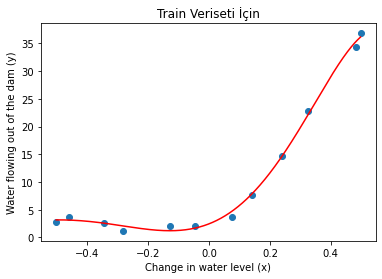

In [17]:
x_range = np.linspace(x_train[:,1].min(),x_train[:,1].max(),1000).reshape(-1,1)
temp = np.concatenate([np.ones((x_range.shape[0],1)),polinom_feature(x_range,derece)],axis=1)
plt.scatter(x_train[:,1],y_train)
plt.plot(x_range,thetas.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.title("Train Veriseti İçin")
plt.show()

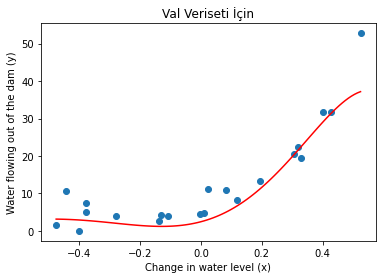

In [18]:
x_range = np.linspace(x_val[:,1].min(),x_val[:,1].max(),100).reshape(-1,1)
temp = np.concatenate([np.ones((x_range.shape[0],1)),polinom_feature(x_range,derece)],axis=1)
plt.scatter(x_val[:,1],y_val)
plt.plot(x_range,thetas.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.title("Val Veriseti İçin")
plt.show()

### Örnek sayısının başarıma etkisi

In [19]:
iterasyon = 10000
ornek_sayilari = range(1,x_train.shape[0]+1)

In [20]:
son_losslar_train = list()
son_losslar_val = list()
for ornek_sayisi in ornek_sayilari:
    thetas = np.ones((1,x_train.shape[1]))
    for i in range(iterasyon):
        for j in range(ornek_sayisi):
            thetas = gradient_descent_reg(thetas,x_train[j:j+1],y_train[j:j+1],lr=0.31,reg_katsayi=0)
    son_losslar_train.append(loss_hesapla_reg(thetas,x_train[:ornek_sayisi],y_train[:ornek_sayisi]))
    son_losslar_val.append(loss_hesapla(thetas,x_val,y_val))

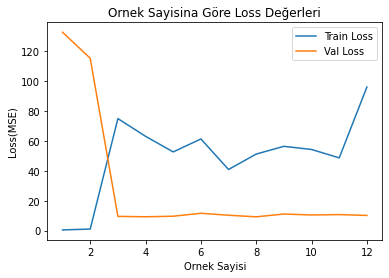

In [21]:
plt.plot(range(1,len(son_losslar_train)+1),son_losslar_train)
plt.plot(range(1,len(son_losslar_val)+1),son_losslar_val)
plt.xlabel("Ornek Sayisi")
plt.ylabel("Loss(MSE)")
plt.legend(["Train Loss","Val Loss"])
plt.title("Ornek Sayisina Göre Loss Değerleri")
plt.show()

### Normal Equation İle Polinomsal Lineer Regresyon

In [22]:
reg_values = [0,0.001,0.01,0.1,1,10,100,1000]
#reg_values = range(10)

In [23]:
son_losslar_train = list()
son_losslar_val = list()
for reg_value in reg_values:
    reg_matrix = np.eye(x_train.shape[1])
    reg_matrix[0,0] = 0.
    thetas_norm_eq = np.linalg.pinv(x_train.T.dot(x_train)+reg_matrix*reg_value).dot(x_train.T).dot(y_train)
    son_losslar_train.append(loss_hesapla_reg(thetas_norm_eq.reshape(1,-1),x_train,y_train,reg_katsayi=reg_value))
    son_losslar_val.append(loss_hesapla(thetas_norm_eq.reshape(1,-1),x_val,y_val))

In [32]:
son_losslar_val

[7.286591476433012,
 9.931832504928575,
 10.385056323194915,
 15.644360189770945,
 36.66665652399256,
 70.3623833765269,
 80.8497841916982,
 82.1094233157895]

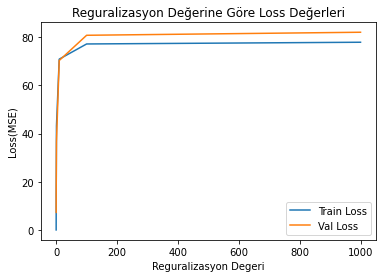

In [24]:
plt.plot(reg_values,son_losslar_train)
plt.plot(reg_values,son_losslar_val)
plt.xlabel("Reguralizasyon Degeri")
plt.ylabel("Loss(MSE)")
plt.legend(["Train Loss","Val Loss"])
plt.title("Reguralizasyon Değerine Göre Loss Değerleri")
plt.show()

In [86]:
best_reg_value_norm = reg_values[son_losslar_val.index(min(son_losslar_val))]
reg_matrix = np.eye(x_train.shape[1])
reg_matrix[0,0] = 0.
thetas_norm_eq = np.linalg.pinv(x_train.T.dot(x_train)+reg_matrix*best_reg_value_norm).dot(x_train.T).dot(y_train).reshape(1,-1)

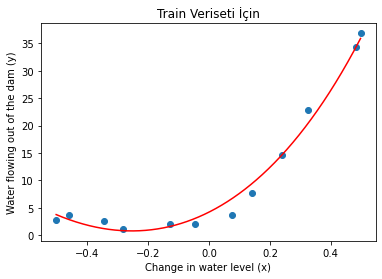

In [88]:
x_range = np.linspace(x_train[:,1].min(),x_train[:,1].max(),1000).reshape(-1,1)
temp = np.concatenate([np.ones((x_range.shape[0],1)),polinom_feature(x_range,derece)],axis=1)
plt.scatter(x_train[:,1],y_train)
plt.plot(x_range,thetas_norm_eq.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.title("Train Veriseti İçin")
plt.show()

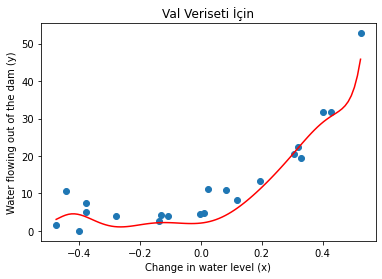

In [85]:
x_range = np.linspace(x_val[:,1].min(),x_val[:,1].max(),100).reshape(-1,1)
temp = np.concatenate([np.ones((x_range.shape[0],1)),polinom_feature(x_range,derece)],axis=1)
plt.scatter(x_val[:,1],y_val)
plt.plot(x_range,thetas_norm_eq.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.title("Val Veriseti İçin")
plt.show()

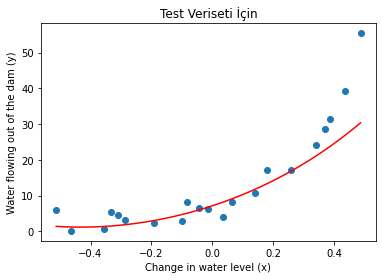

In [39]:
x_range = np.linspace(x_test[:,1].min(),x_test[:,1].max(),100).reshape(-1,1)
temp = np.concatenate([np.ones((x_range.shape[0],1)),polinom_feature(x_range,derece)],axis=1)
plt.scatter(x_test[:,1],y_test)
plt.plot(x_range,thetas_norm_eq.dot(temp.T).reshape(-1,1),"r")
plt.xlabel("Change in water level (x)")
plt.ylabel("Water flowing out of the dam (y)")
plt.title("Test Veriseti İçin")
plt.show()

In [29]:
x_train.shape

(12, 11)

In [30]:
thetas.shape

(1, 11)